In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(r"C:\Users\Admin\Desktop\codebasic\insurance.txt")

In [3]:
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


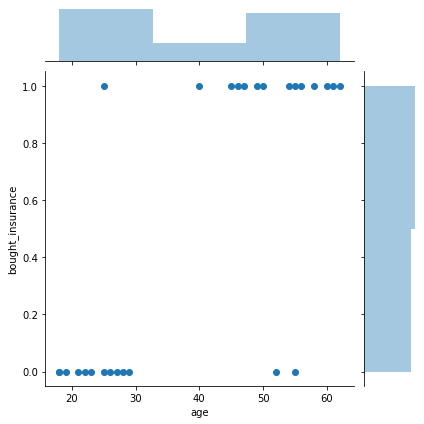

In [4]:
sns.jointplot(x='age',y='bought_insurance',data=df)

In [5]:
df.shape

(27, 2)

In [6]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.9)

In [9]:
X_test

,age
1,25
23,45
16,25


In [10]:
X_train

,age
13,29
7,60
4,46
18,19
14,49
22,40
11,28
25,54
6,55
2,47


In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
model = LogisticRegression()

In [13]:
model.fit(X_train,y_train)#training the model

LogisticRegression()

In [15]:
X_test

,age
1,25
23,45
16,25


In [14]:
model.predict(X_test)
#in the above output age 25 and 25 are younger so not going to buy insurance 
#45 age is older so he will buy

array([0, 1, 0], dtype=int64)

In [17]:
model.score(X_test,y_test)#checking the accuracy

0.6666666666666666

In [18]:
model.score(X_train,y_train)

0.875

# Logistic Regression Multiple variables

In [4]:
from sklearn.datasets import load_digits

In [5]:
digits = load_digits()#training set

In [6]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [9]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

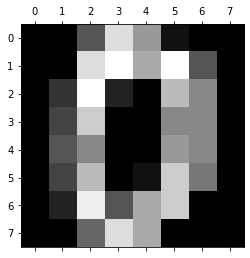

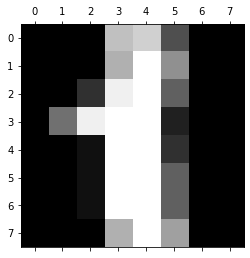

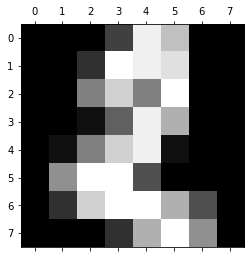

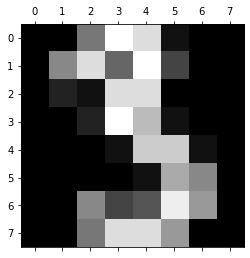

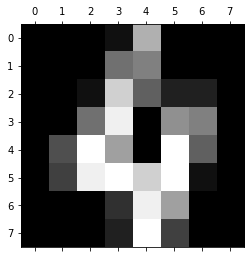

In [13]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [14]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test =train_test_split(digits.data, digits.target,test_size=0.2)
#this means taking data from datatset and dividing them into test and train sets

In [19]:
len(X_test)

450

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [21]:
model.fit(X_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
model.score(X_test,y_test)

0.9711111111111111

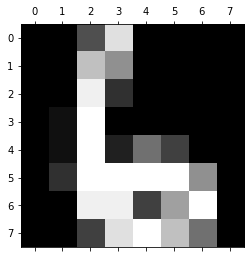

In [23]:
plt.matshow(digits.images[67])

In [24]:
digits.target[67]

6

In [25]:
model.predict([digits.data[67]])

array([6])

In [26]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

# Confusion matrix

In [29]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix

cm= confusion_matrix(y_test, y_predicted)
cm

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 48,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 56,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2, 47,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 54,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 43,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  1, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 34,  0,  0],
       [ 0,  3,  1,  1,  2,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 39]], dtype=int64)

Text(69.0, 0.5, 'Truth')

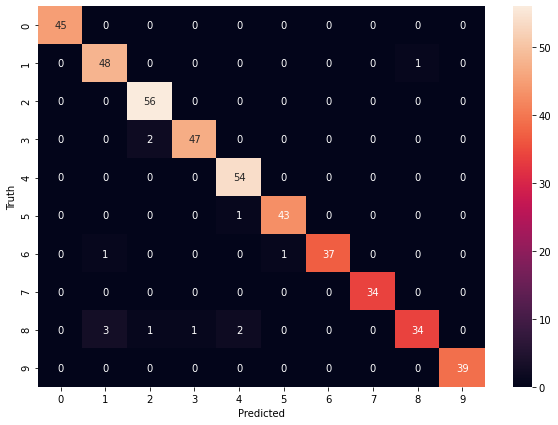

In [31]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')